In [1]:
from gibbs import *
from data_simu import *

## 1.Simulate Data

In [2]:
# data dimension
d = 5
# true component dimension
q_star = 1
# sample size
n_sample = 1000
# true sigma2
sigma2_star = 1
# true component variance parameter
a_star_list = 1 / np.linspace(1,10,q_star)

In [3]:
X = generate_data(d, q_star, n_sample, sigma2_star, a_star_list)

Text(0, 0.5, 'Component j')

<Figure size 720x432 with 0 Axes>

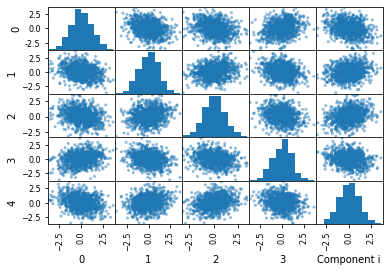

In [4]:
plt.figure(figsize=(10,6))
pd.plotting.scatter_matrix(pd.DataFrame(X).T)
plt.xlabel('Component i')
plt.ylabel('Component j')

## 2. Gibbs Sampling

### 2.1 Prior Parameter Setup

In [27]:
q = d-1
prior_param = dict({'beta_sigma2':2,
      'a_sigma2':10,
      'a_aj': 1 / np.linspace(1,10,q),
      'beta_aj':1 / np.linspace(1,10,q)    
})

### 2.2 Inference Parameter Setup

In [28]:
init_dict = dict({'Z0':np.random.multivariate_normal(np.zeros([q]), np.diag(np.ones([q])), n_sample).T,
            "sigma20":1.5,
            "w0":np.random.normal(0, 0.6, [d,q]),
            "alpha0": np.ones(q)    
})

iterations = 2000

### 2.3 Inference Sampling standard

In [29]:
infer_list = gibbs_scheme(X, init_dict, iterations, q, prior_param)
sigma2_list = infer_list[0]
Z_list = infer_list[1]
W_list = infer_list[2]
alpha_list = infer_list[3]
warmup = int(iterations/2)

In [30]:
print(pd.DataFrame(alpha_list[warmup:]).mean())

0     2.779691
1     6.877748
2     7.348388
3    15.477844
dtype: float64


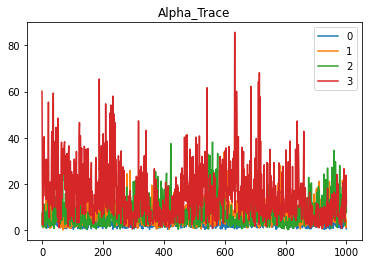

In [31]:
pd.DataFrame(alpha_list[warmup:]).plot()
#pd.DataFrame(W_list[-1]).plot.hist()
plt.title('Alpha_Trace')
plt.show()

Text(0.5, 1.0, 'Sigma2 trace')

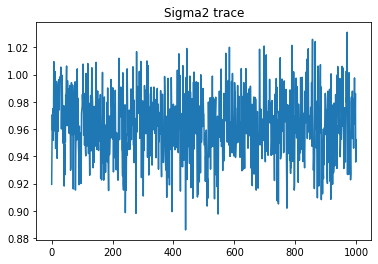

In [32]:
plt.plot(sigma2_list[warmup:])
plt.title('Sigma2 trace')

### 2.4 Inference Sampling Approxmiate

In [37]:
infer_list = gibbs_scheme(X, init_dict, iterations, q, prior_param, xi =0.5)
sigma2_list = infer_list[0]
Z_list = infer_list[1]
W_list = infer_list[2]
alpha_list = infer_list[3]
warmup = int(iterations/2)

In [43]:
print(pd.DataFrame(alpha_list[warmup:]).mean())

0     3.086920
1     7.443893
2    12.948839
3     1.022727
dtype: float64


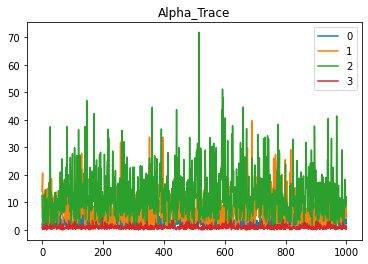

In [39]:
pd.DataFrame(alpha_list[warmup:]).plot()
#pd.DataFrame(W_list[-1]).plot.hist()
plt.title('Alpha_Trace')
plt.show()

Text(0.5, 1.0, 'Sigma2 trace')

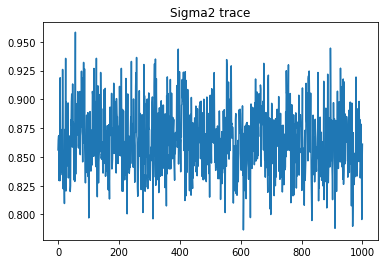

In [40]:
plt.plot(sigma2_list[warmup:])
plt.title('Sigma2 trace')